# Scatter plot with histograms

Source: https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html#sphx-glr-gallery-lines-bars-and-markers-scatter-hist-py

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

# random data
x = np.random.randn(1000)
y = np.random.randn(1000)


def scatter_hist(x, y, ax, ax_histx, ax_histy):
    '''
        This function takes x and y data as input, as 
        well as three axes, the main axes for the scatter, 
        and two marginal axes. It will then create the 
        scatter and histograms inside the provided axes.
    '''
    # no labels
    ax_histx.tick_params(axis='x', labelbottom=False)
    ax_histy.tick_params(axis='y', labelleft=False)
    
    # the scatter plot:
    ax.scatter(x, y)
    
    # determine limits by hand
    bindwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/bindwidth) + 1) * bindwidth
    
    bins = np.arange(-lim, lim + bindwidth, bindwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

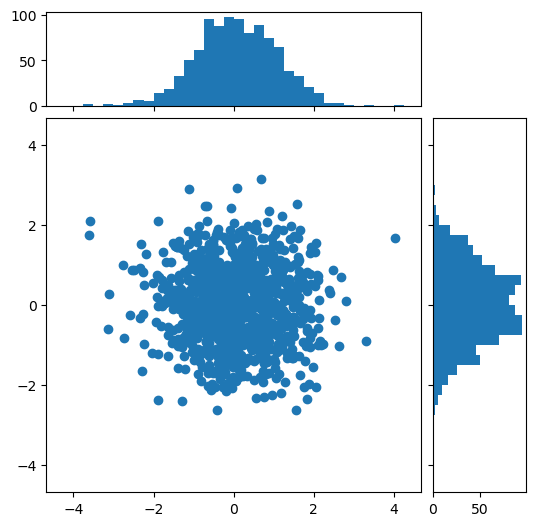

In [13]:
# Defining the axes positions using a gridspec.

fig = plt.figure(figsize=(6, 6))
# Add a gridspec with two rows and two columns and a ratio
# of 1 to 4 between the size of the marginal axes and the main 
# axes in both directions. Also adjust the subplot
# parameter for a square plot.
gs = fig.add_gridspec(2, 2, width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.
scatter_hist(x, y, ax, ax_histx, ax_histy)

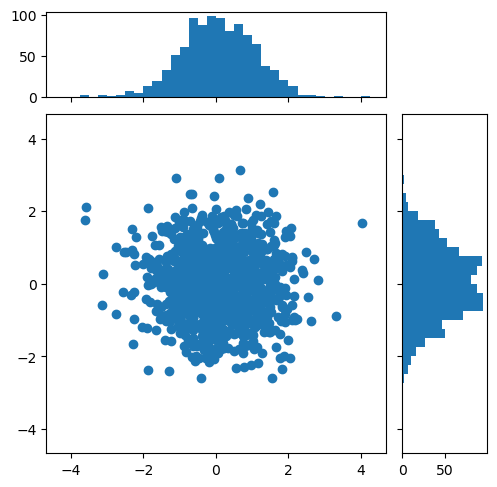

In [17]:
# Defining the axes positions using inset_axes

# Create a Figure, which doesn`t have to be square.
fig = plt.figure(layout='constrained')
# Create the main axes, leaving 25% of the figure space at the top
# and on the right to position marginals.
ax = fig.add_gridspec(top=0.75, right=0.75).subplots()
# The main axes aspect can be fixed.
ax.set(aspect=1)
# Create marginal axes, which have 25% of the size ofthe main axes.
# Inset axes are positioned *outside* (on the right and the top)
# of the main axes, by specifying axes coordinates greater than 1.
# Axes coordinates less than 0 would likewise specify positions on
# the left and the bottom of the main axes.
ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
# Draw the scatter plot and marginals.
scatter_hist(x, y, ax, ax_histx, ax_histy)

plt.show()